# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.307995e+01     1.450091e+01
 * time: 0.0022249221801757812
     1     6.348462e+01     1.010242e+01
 * time: 0.00609898567199707
     2     5.817905e+01     1.375843e+01
 * time: 0.014935016632080078
     3     4.161348e+01     9.243321e+00
 * time: 0.026753902435302734
     4     3.115593e+01     7.707180e+00
 * time: 0.08716106414794922
     5     2.390509e+01     6.025414e+00
 * time: 0.09775996208190918
     6     2.219621e+01     6.837141e+00
 * time: 0.1065528392791748
     7     1.092407e+01     2.268201e+00
 * time: 0.11522603034973145
     8     8.797918e+00     4.017565e+00
 * time: 0.12945294380187988
     9     7.745176e+00     2.480128e+00
 * time: 0.14815902709960938
    10     7.332838e+00     3.023324e+00
 * time: 0.16329193115234375
    11     7.011078e+00     1.586278e+00
 * time: 0.1784038543701172
    12     6.596354e+00     2.336830e+00
 * time: 0.22464299201965332
    13     6.035842e+00     1.631928e+00
 * tim

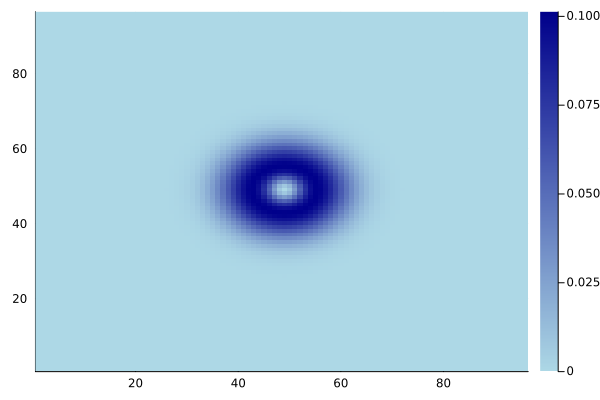

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)